In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

#### In this first section, I'm using the lovely Diffractio package to simulate light waves propagating in space and the diffraction patterns and intensity distributions they produce. I then use the de Broglie wavelengths of electrons to do the same and demonstrate the wave behavior of matter.

Good result: factor 9.45


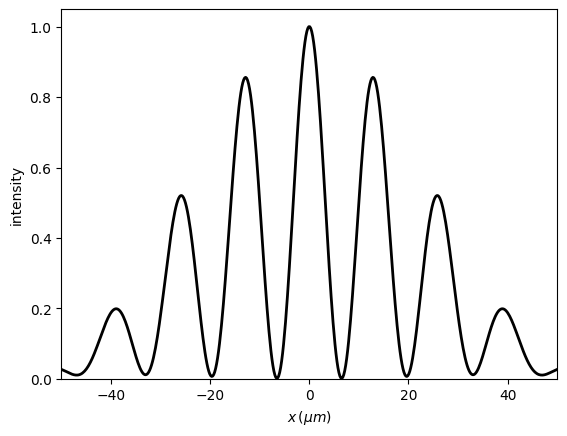

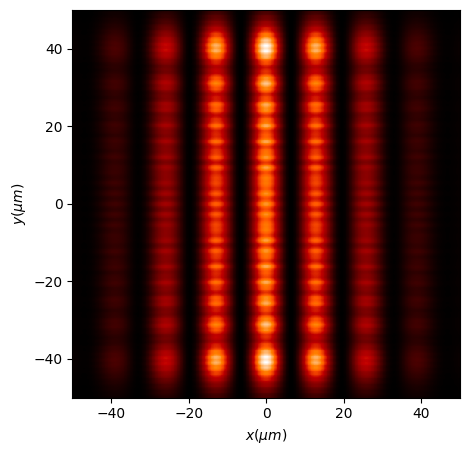

In [17]:
num_pixels = 512

# Setting the dimensions of the output chart.
length = 100 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)

# Setting the wavelength, we'll start with red light (about 650 nanometers).
wavelength = 0.650 * um

# Representing the light with a plane wave in both 1D and 2D space.
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u11 = Scalar_source_X(x=x0, wavelength=wavelength)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)
u11.plane_wave(A=1, theta=0 * degrees)


# Setting the deimensions of the double slit.
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t11 = Scalar_mask_X(x=x0, wavelength=wavelength)
t1.double_slit(x0=0, size=2 * um, separation=10 * um, angle=0 * degrees)
t11.double_slit(x0=0, size=2 * um, separation=10 * um)


# Shining the light through the slits and using the Rayleigh-Sommerfeld diffraction approximation.
u2 = u1 * t1
u3 = u2.RS(z=200 * um, new_field=True)
u21 = u11 * t11
u31 = u21.RS(z=200 * um, new_field=True)

# Drawing the resulting intensity distribution on a 1D and 2D sensor. I think this gives readers a better intuition for what the diffraction pattern and intensity distribution represent.
u31.draw(normalize='maximum')
plt.savefig('../output/light_intensity.pdf')

u3.draw()
plt.savefig('../output/light_diffraction.pdf')

Good result: factor 4.99


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x2a7f45120>)

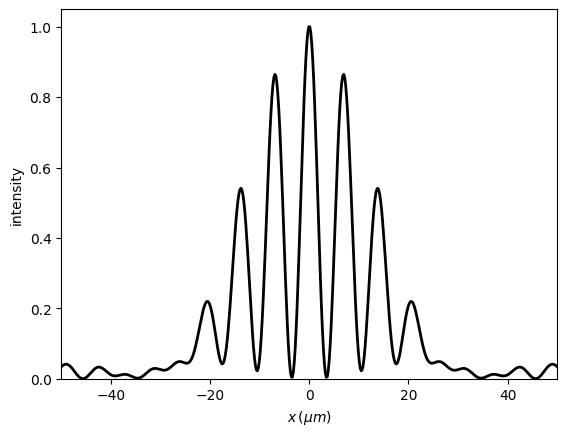

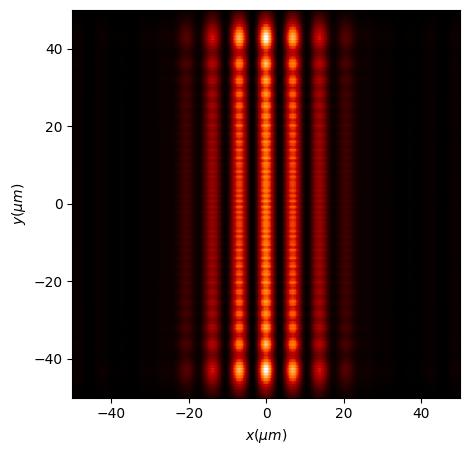

In [29]:
# Doing the same thing here, but using a de Broglie wavelength to represent an electron in a hydrogen atom (traveling about 2.2*10e5 m/s).
num_pixels = 512

length = 100 * um
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)

wavelength= 0.001 * um

u1 = Scalar_source_X(x=x0, wavelength=wavelength)
t1 = Scalar_mask_X(x=x0, wavelength=wavelength)

u11 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
t11 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

u11.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)
t11.double_slit(x0=0, size= 2 * um, separation= 10 * um, angle=0 * degrees)


u1.plane_wave(A=1, theta=0 * degrees)
t1.double_slit(x0=0, size= 2 * um, separation= 10 * um)

u2 = u1 * t1
u3 = u2.RS(z=70000 * um, new_field=True)

u21 = u11 * t11
u31 = u21.RS(z=70000 * um, new_field=True)

u3.draw(normalize='maximum')
#plt.savefig('../output/electron_intensity.pdf')

u31.draw()
#plt.savefig('../output/electron_diffraction.pdf')

